In [234]:
# Load libraries and the database that our log_digester.py created
import common
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
conn = common.connect_db('db.sqlite')

plt.rcParams['figure.figsize'] = [20, 10]
df = pd.read_sql_query("SELECT * from attack_log", conn)

## Attacks by Country

Here is some markdown, blah blah blah

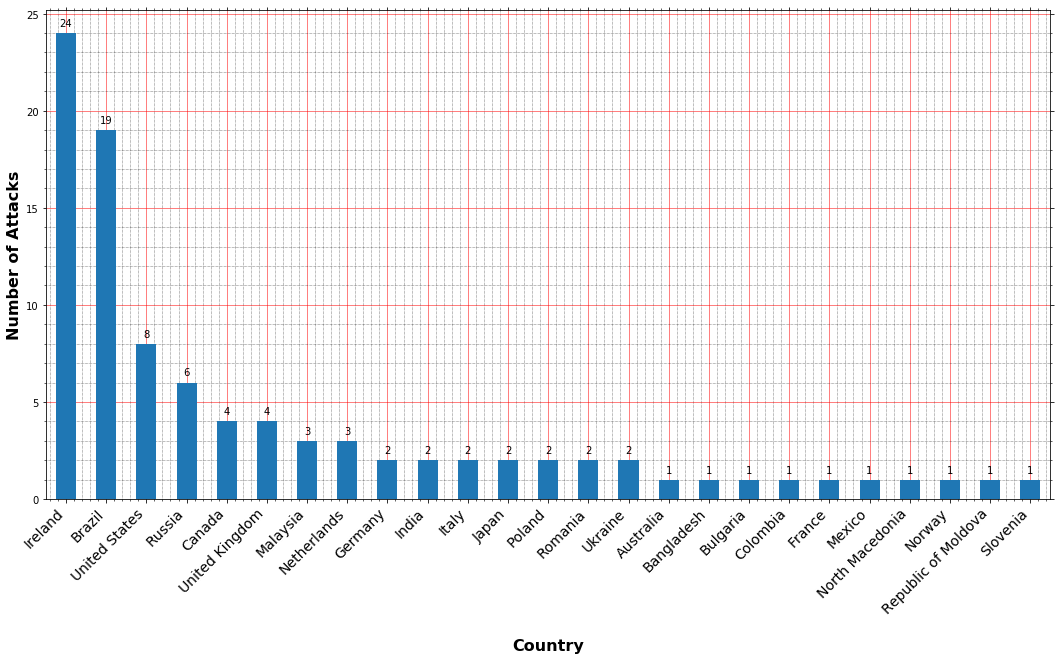

In [74]:
# Group data by country
country = df.groupby(['country_name']).size().to_frame('attack_count').reset_index().sort_values(by=['attack_count','country_name'], ascending=[False, True])

# Use the rank function to sort countries by the number of attacks
country['Rank'] = country['attack_count'].rank(method='dense', ascending=False).astype(int)

fig, ax = plt.subplots()
country[0:25].plot('country_name','attack_count', legend = None, kind='bar', color = '#1f77b4', figsize=(18, 9), ax=ax)

ax.set_xlabel('\nCountry', fontweight="bold", size=16)
ax.set_ylabel('Number of Attacks', fontweight="bold", size=16)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=14, rotation=45, ha="right")

# Don't allow the axis to be on top of your data
ax.set_axisbelow(True)

for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2),
    (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center',
    xytext=(0, 10), textcoords='offset points')
    # Turn on the minor TICKS, which are required for the minor GRID

ax.minorticks_on()

# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
# Customize the minor grid
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
# Turn off the display of all ticks.
ax.tick_params(which='both', # Options for both major and minor ticks
        top=True, # turn off top ticks
        left=True, # turn off left ticks
        right=True, # turn off right ticks
        bottom=True) # turn off bottom ticks


## Attacks by City of Origin

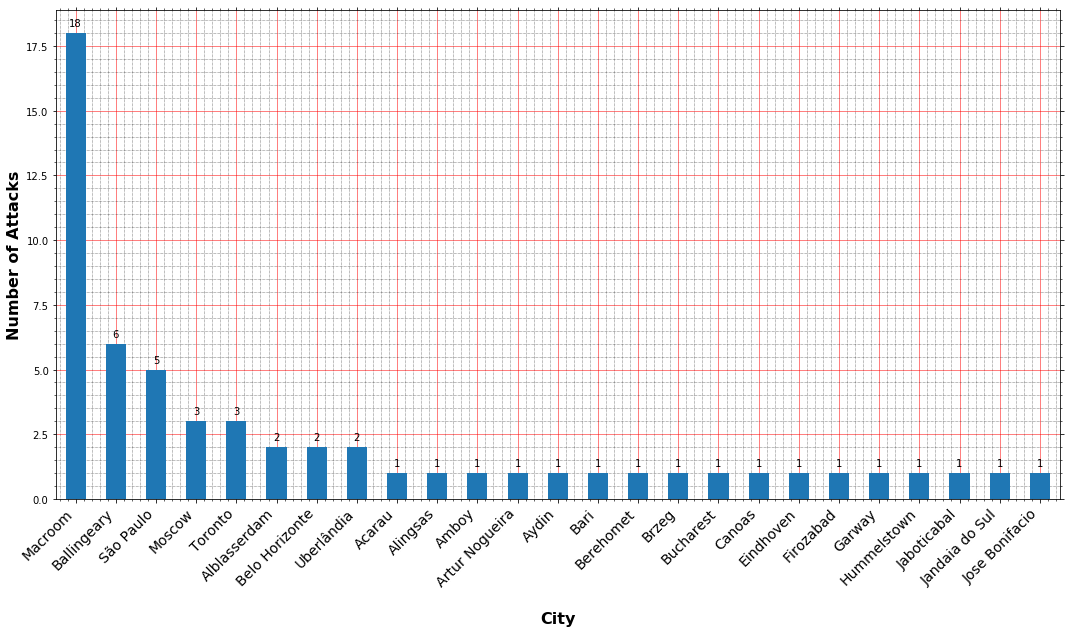

In [73]:
# Group data by country
country = df.groupby(['city_name']).size().to_frame('attack_count').reset_index().sort_values(by=['attack_count','city_name'], ascending=[False, True])

# Use the rank function to sort countries by the number of attacks
country['Rank'] = country['attack_count'].rank(method='dense', ascending=False).astype(int)

fig, ax = plt.subplots()
country[0:25].plot('city_name','attack_count', legend = None, kind='bar', color = '#1f77b4', figsize=(18, 9), ax=ax)


ax.set_xlabel('\nCountry', fontweight="bold", size=16)
ax.set_ylabel('Number of Attacks', fontweight="bold", size=16)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=14, rotation=45, ha="right")

# Don't allow the axis to be on top of your data
ax.set_axisbelow(True)

for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2),
    (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center',
    xytext=(0, 10), textcoords='offset points')
    # Turn on the minor TICKS, which are required for the minor GRID

ax.minorticks_on()

# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
# Customize the minor grid
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
# Turn off the display of all ticks.
ax.tick_params(which='both', # Options for both major and minor ticks
        top=True, # turn off top ticks
        left=True, # turn off left ticks
        right=True, # turn off right ticks
        bottom=True) # turn off bottom ticks


## Most Active IP Addresses

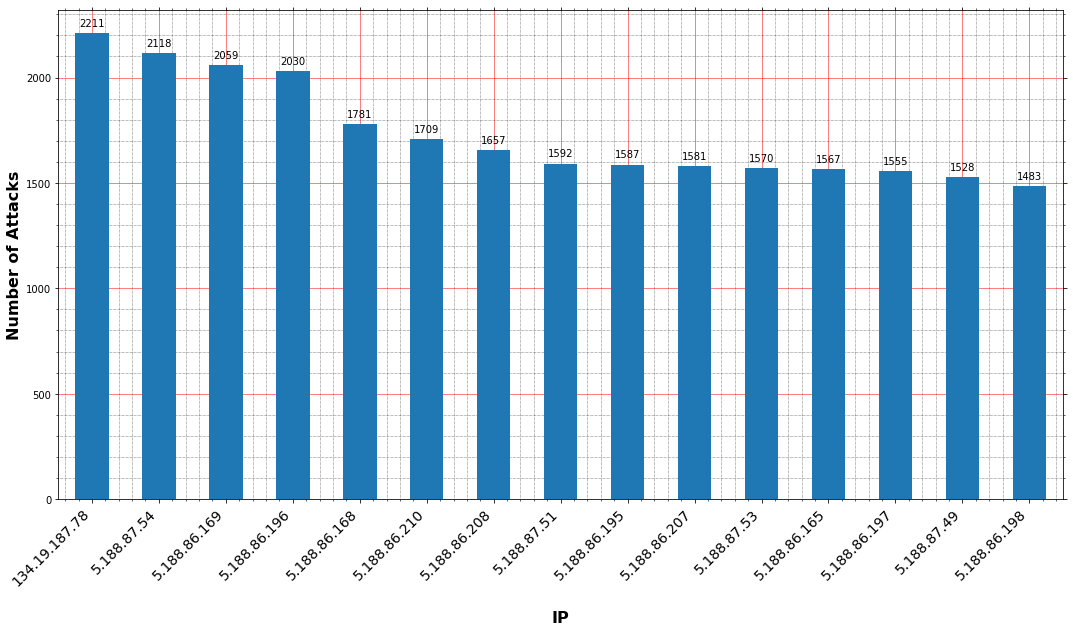

In [369]:
# Group data by country

data = pd.read_sql_query("SELECT * from attack_log", conn)

# Filter data
data = data[['src_ip','attack_count']]
data = data.where((pd.notnull(data)),None)
data = data[~data['attack_count'].isin(['NaN','nan',None,'0',''])]

# This fixes a strange glitch where attack_count was shown as float
data["attack_count"] = pd.to_numeric(data["attack_count"], downcast='integer')

data = data.sort_values(['attack_count'],ascending=False)

fig, ax = plt.subplots()

data[0:15].plot('src_ip','attack_count', legend = None, kind='bar', color = '#1f77b4', figsize=(18, 9), ax=ax)

ax.set_xlabel('\nIP', fontweight="bold", size=16)
ax.set_ylabel('Number of Attacks', fontweight="bold", size=16)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=14, rotation=45, ha="right")

# Don't allow the axis to be on top of your data
ax.set_axisbelow(True)

for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2),
    (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center',
    xytext=(0, 10), textcoords='offset points')
    # Turn on the minor TICKS, which are required for the minor GRID

ax.minorticks_on()

# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
# Customize the minor grid
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
# Turn off the display of all ticks.
ax.tick_params(which='both', # Options for both major and minor ticks
        top=True, # turn off top ticks
        left=True, # turn off left ticks
        right=True, # turn off right ticks
        bottom=True) # turn off bottom ticks